In [60]:
from pathlib import Path
import os
from tqdm.auto import tqdm
import argparse
import scipy.io
import json

# 1. Market1501

## 1.1 Create new dataset and it's subfolder (train, test, query, train_val)

In [58]:
# Import library
from pathlib import Path

# Market1501 dataset dir
raw_data_dir_market1501 = Path('/home/jun/ReID_Dataset/market')

# Make dictionary of all image market1501 with keys of image_name and values of image_path
market_train_dic = {i.name:i for i in sorted(list(raw_data_dir_market1501.glob('bounding_box_train/*.jpg')))}
market_gallery_dic = {i.name:i for i in sorted(list(raw_data_dir_market1501.glob('bounding_box_test/*.jpg')))}
market_query_dic = {i.name:i for i in sorted(list(raw_data_dir_market1501.glob('query/*.jpg')))}

# Make new dataset dir
new_market_dir = raw_data_dir_market1501 / 'dataloader' 
new_market_dir.mkdir(exist_ok=True) # Making new dataset dir as olod_dir/dataloader
market_train_dir = new_market_dir / 'train'
market_gallery_dir = new_market_dir / 'gallery'
market_query_dir = new_market_dir / 'query'
market_train_dir.mkdir(exist_ok=True) # Making train dir
market_gallery_dir.mkdir(exist_ok=True) # Making gallery dir
market_query_dir.mkdir(exist_ok=True) # Making query dir

# Making train and val dataset (first picture will be use for validation)
market_train_val_dir = new_market_dir / 'train_val'
market_train_val_dir.mkdir(exist_ok=True)
market_train_small_dir = market_train_val_dir / 'train'
market_train_small_dir.mkdir(exist_ok=True) 
market_val_dir = market_train_val_dir / 'val'
market_val_dir.mkdir(exist_ok=True) 

## 1.2 Create label folder and put image in label folder

In [59]:
# Proceed train and val data
print('Proceeding train and val data')
for img_name, img_path in tqdm(market_train_dic.items()):
    label = img_name.split('_')[0]
    train_label = market_train_dir / label # Create train/<label> folder
    train_label.mkdir(exist_ok=True)
    train_small_label = market_train_small_dir / label # Create train_val/train/<label> folder
    train_small_label.mkdir(exist_ok=True)
    val_label = market_val_dir / label # Create train_val/val/<label> folder
    val_label.mkdir(exist_ok=True)
    (train_label / img_name).write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (train/<label>/*.img)
    if len(list(val_label.glob('*.jpg'))) < 1:
        (val_label / img_name).write_bytes(img_path.read_bytes()) # Put first pic of each label into train_val/val/<label>/*.img
    else:
        (train_small_label / img_name).write_bytes(img_path.read_bytes()) # Put every pic except fist one of each label into train_val/train/<label>/*.img 
    
# Process gallery data     
print('Proceeding gallery data')
for i, (img_name, img_path) in tqdm(enumerate(market_gallery_dic.items())):
    label = img_name.split('_')[0]
    gallery_label = market_gallery_dir / label # Create gallery/<label> folder
    gallery_label.mkdir(exist_ok=True)
    (gallery_label / img_name).write_bytes(img_path.read_bytes()) # Put all image to gallery folder based on it label (gallery/<label>/*.img)
    
# Proceed query data
print('Proceeding query data')
for i, (img_name, img_path) in tqdm(enumerate(market_query_dic.items())):
    label = img_name.split('_')[0]
    query_label = market_query_dir / label # Create query/<label> folder
    query_label.mkdir(exist_ok=True)
    (query_label / img_name).write_bytes(img_path.read_bytes()) # Put all image to query folder based on it label (query/<label>/*.img)

Proceeding train and val data


  0%|          | 0/12936 [00:00<?, ?it/s]

Proceeding gallery data


0it [00:00, ?it/s]

Proceeding query data


0it [00:00, ?it/s]

## 1.3 Visualize data

In [71]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random
def show_pic_from_dir(label, dir, pic_number):
    dir = Path(dir)
    pic_list = sorted(list((dir / label).glob('*.jpg'))) + sorted(list((dir / label).glob('*.png')))
    if pic_number > len(pic_list):
        pic_number = len(pic_list)
    # 4. Get random sample indexes
    random_sample_idx = random.sample(range(len(pic_list)), k=pic_number)
    
    # 5. Setup plot
    plt.figure(figsize=(16,8))
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    # 6. Loop through random indexes and plot them with matplotlib
    #for i, idx in enumerate(random_sample_idx):
    for i, idx in enumerate(range(pic_number)):
        img = Image.open(pic_list[idx])
        # Plot adjusted samples
        plt.subplot(1, pic_number, i+1)
        plt.imshow(img)
        plt.axis(False)

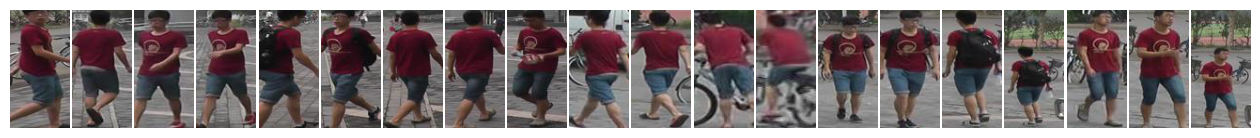

In [80]:
show_pic_from_dir('0002', '/home/jun/ReID_Dataset/market/dataloader/train', 20)

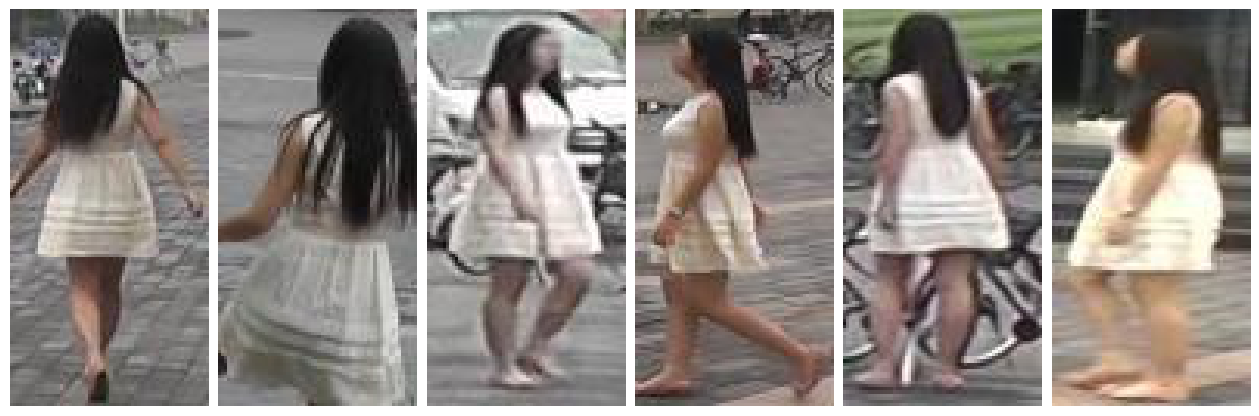

In [76]:
show_pic_from_dir('0001', '/home/jun/ReID_Dataset/market/dataloader/query', 10)

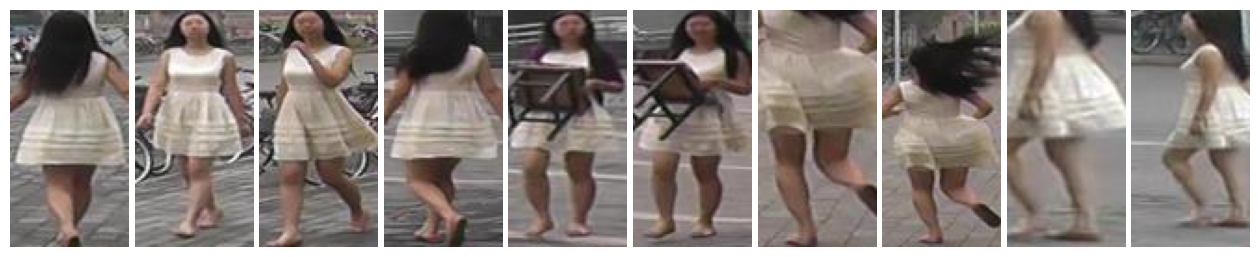

In [74]:
show_pic_from_dir('0001', '/home/jun/ReID_Dataset/market/dataloader/gallery', 10)

# 2. Duke MTMC

## 2.1 Create new dataset and it's subfolder (train, test, query, train_val)

In [81]:
# DukeMTMC dataset dir
raw_data_dir_duke = Path('/home/jun/ReID_Dataset/duke')

# Make dictionary of all image DukeMTMC with keys of image_name and values of image_path
duke_train_dic = {i.name:i for i in sorted(list(raw_data_dir_duke.glob('bounding_box_train/*.jpg')))}
duke_gallery_dic = {i.name:i for i in sorted(list(raw_data_dir_duke.glob('bounding_box_test/*.jpg')))}
duke_query_dic = {i.name:i for i in sorted(list(raw_data_dir_duke.glob('query/*.jpg')))}

# Make new dataset dir
new_duke_dir = raw_data_dir_duke / 'dataloader' 
new_duke_dir.mkdir(exist_ok=True) # Making new dataset dir as olod_dir/dataloader
duke_train_dir = new_duke_dir / 'train'
duke_gallery_dir = new_duke_dir / 'gallery'
duke_query_dir = new_duke_dir / 'query'
duke_train_dir.mkdir(exist_ok=True) # Making train dir
duke_gallery_dir.mkdir(exist_ok=True) # Making gallery dir
duke_query_dir.mkdir(exist_ok=True) # Making query dir

# Making train and val dataset (first picture will be use for validation)
duke_train_val_dir = new_duke_dir / 'train_val'
duke_train_val_dir.mkdir(exist_ok=True)
duke_train_small_dir = duke_train_val_dir / 'train'
duke_train_small_dir.mkdir(exist_ok=True) 
duke_val_dir = duke_train_val_dir / 'val'
duke_val_dir.mkdir(exist_ok=True) 

## 2.2 Create label folder and put image in label folder

In [82]:
# Proceed train and val data
print('Proceeding train and val data')
for img_name, img_path in tqdm(duke_train_dic.items()):
    label = img_name.split('_')[0]
    train_label = duke_train_dir / label # Create train/<label> folder
    train_label.mkdir(exist_ok=True)
    train_small_label = duke_train_small_dir / label # Create train_val/train/<label> folder
    train_small_label.mkdir(exist_ok=True)
    val_label = duke_val_dir / label # Create train_val/val/<label> folder
    val_label.mkdir(exist_ok=True)
    (train_label / img_name).write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (train/<label>/*.img)
    if len(list(val_label.glob('*.jpg'))) < 1:
        (val_label / img_name).write_bytes(img_path.read_bytes()) # Put first pic of each label into train_val/val/<label>/*.img
    else:
        (train_small_label / img_name).write_bytes(img_path.read_bytes()) # Put every pic except fist one of each label into train_val/train/<label>/*.img 
    
# Process gallery data     
print('Proceeding gallery data')
for img_name, img_path in tqdm(duke_gallery_dic.items()):
    label = img_name.split('_')[0]
    gallery_label = duke_gallery_dir / label # Create gallery/<label> folder
    gallery_label.mkdir(exist_ok=True)
    (gallery_label / img_name).write_bytes(img_path.read_bytes()) # Put all image to gallery folder based on it label (gallery/<label>/*.img)
    
# Proceed query data
print('Proceeding query data')
for img_name, img_path in tqdm(duke_query_dic.items()):
    label = img_name.split('_')[0]
    query_label = duke_query_dir / label # Create query/<label> folder
    query_label.mkdir(exist_ok=True)
    (query_label / img_name).write_bytes(img_path.read_bytes()) # Put all image to query folder based on it label (query/<label>/*.img)

Proceeding train and val data


  0%|          | 0/16522 [00:00<?, ?it/s]

Proceeding gallery data


  0%|          | 0/17661 [00:00<?, ?it/s]

Proceeding query data


  0%|          | 0/2228 [00:00<?, ?it/s]

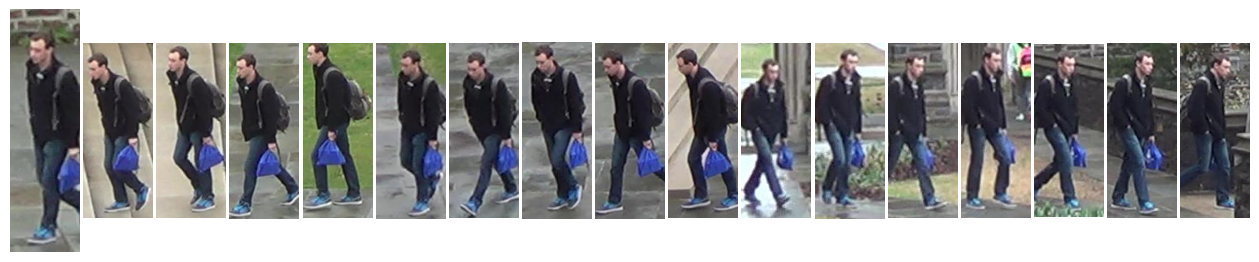

In [84]:
show_pic_from_dir('0005', '/home/jun/ReID_Dataset/duke/dataloader/gallery', 20)

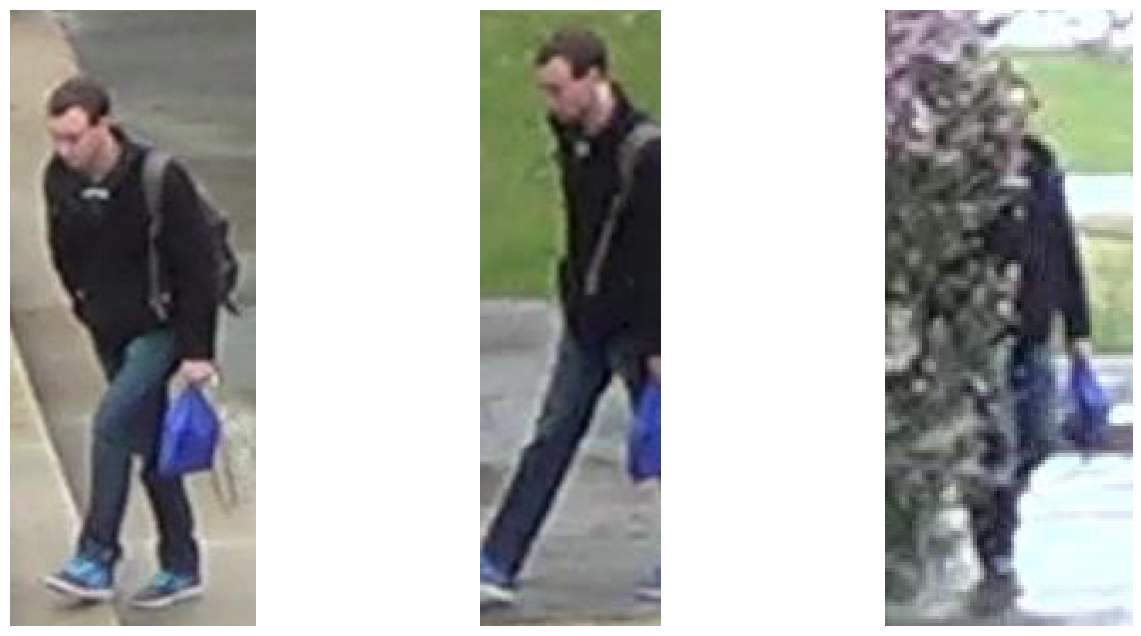

In [42]:
show_pic_from_dir('0005', '/home/jun/ReID_Dataset/duke/dataloader/query', 10)

# 3. CUHK03

## 3.1 Create new dataset with .mat file and it's subfolder (train, test, query, train_val)

In [85]:
# cuhk03detected dataset dir
raw_data_dir_cuhk03 = Path('/home/jun/ReID_Dataset/cuhk03')
detected = scipy.io.loadmat('/home/jun/ReID_Dataset/cuhk03/cuhk03_new_protocol_config_detected.mat')

In [86]:
detected
print(f"Type of detected: {type(detected)}")
print(f"Keys of detected: {detected.keys()}")
print(f"Number of labels: {len(set(detected['labels'].squeeze()))}")
print(f"Shape of filelist: {detected['filelist'].shape}, labels: {detected['labels'].shape}, query_idx: {detected['query_idx'].shape}, gallery_idx: {detected['gallery_idx'].shape}, train_idx: {detected['train_idx'].shape}")

Type of detected: <class 'dict'>
Keys of detected: dict_keys(['__header__', '__version__', '__globals__', 'camId', 'filelist', 'labels', 'query_idx', 'gallery_idx', 'train_idx'])
Number of labels: 1467
Shape of filelist: (14097, 1), labels: (14097, 1), query_idx: (1400, 1), gallery_idx: (5332, 1), train_idx: (7365, 1)


In [87]:
# Make dictionary of all image cuhk03detected with keys of image_name and values of image_path
detected_dic = {i.name:i for i in sorted(list(raw_data_dir_cuhk03.glob('images_detected/*.png')))}

# Make new dataset dir for labeled data
new_cuhk03detected_dir = raw_data_dir_cuhk03 / 'dataloader_new_protocal_detected' 
new_cuhk03detected_dir.mkdir(exist_ok=True) # Making new dataset dir as olod_dir/dataloader
cuhk03detected_train_dir = new_cuhk03detected_dir / 'train'
cuhk03detected_gallery_dir = new_cuhk03detected_dir / 'gallery'
cuhk03detected_query_dir = new_cuhk03detected_dir / 'query'
cuhk03detected_train_dir.mkdir(exist_ok=True) # Making train dir
cuhk03detected_gallery_dir.mkdir(exist_ok=True) # Making gallery dir
cuhk03detected_query_dir.mkdir(exist_ok=True) # Making query dir

# Making train and val dataset (first picture will be use for validation)
cuhk03detected_train_val_dir = new_cuhk03detected_dir / 'train_val'
cuhk03detected_train_val_dir.mkdir(exist_ok=True)
cuhk03detected_train_small_dir = cuhk03detected_train_val_dir / 'train'
cuhk03detected_train_small_dir.mkdir(exist_ok=True) 
cuhk03detected_val_dir = cuhk03detected_train_val_dir / 'val'
cuhk03detected_val_dir.mkdir(exist_ok=True)

for id in tqdm(range(len(detected['filelist']))): # Get image id
    img_label = int(detected['labels'][id].squeeze(axis=0)) # Get label of each image
    img_name = str(detected['filelist'].squeeze()[id][0]) # Get name of each image
    
    img_path = detected_dic[img_name]
    
    # Train, train_val data
    if img_label in list(detected['train_idx'].squeeze()): # If image id is in train_idx, put it in train folder
        train_label_folder_path = cuhk03detected_train_dir / str(img_label) # Make train label folder (train/<label>)
        train_label_folder_path.mkdir(exist_ok=True) 
        small_train_label_folder_path = cuhk03detected_train_small_dir / str(img_label) # Make train_val/train/<label> folder
        small_train_label_folder_path.mkdir(exist_ok=True) 
        val_label_folder_path = cuhk03detected_val_dir / str(img_label) # Make train_val/val/<label> folder
        val_label_folder_path.mkdir(exist_ok=True) 
        (train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (train/<label>/*.img)
    if len(list(val_label_folder_path.glob('*.jpg'))) < 1:
        (val_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put first pic of each label into train_val/val/<label>/*.img
    else:
        (small_train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put every pic except fist one of each label into train_val/train/<label>/*.img   

    # Test data
    if img_label in list(detected['gallery_idx'].squeeze()): # If image id is in gallery_idx , put it in train folder
        gallery_label_folder_path = cuhk03detected_gallery_dir / str(img_label) # Make gallery label folder (gallery/<label>)
        gallery_label_folder_path.mkdir(exist_ok=True)  
        target_img_path = gallery_label_folder_path / img_name
        target_img_path.write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (gallery/<label>/*.img)
        
    # Query data
    if img_label in list(detected['query_idx'].squeeze()): # If image id is in query_idx , put it in query folder
        query_label_folder_path = cuhk03detected_query_dir / str(img_label) # Make query label folder (query/<label>)
        query_label_folder_path.mkdir(exist_ok=True)   
        target_img_path = query_label_folder_path / img_name
        target_img_path.write_bytes(img_path.read_bytes()) # Put all image to query folder based on it label (query/<label>/*.img)

  0%|          | 0/14097 [00:00<?, ?it/s]

In [88]:
raw_data_dir_cuhk03 = Path('/home/jun/ReID_Dataset/cuhk03')
labeled = scipy.io.loadmat('/home/jun/ReID_Dataset/cuhk03/cuhk03_new_protocol_config_labeled.mat')

# Make dictionary of all image cuhk03labeled with keys of image_name and values of image_path
labeled_dic = {i.name:i for i in sorted(list(raw_data_dir_cuhk03.glob('images_labeled/*.png')))}

# Make new dataset dir for labeled data
new_cuhk03labeled_dir = raw_data_dir_cuhk03 / 'dataloader_new_protocol_labeled' 
new_cuhk03labeled_dir.mkdir(exist_ok=True) # Making new dataset dir as olod_dir/dataloader
cuhk03labeled_train_dir = new_cuhk03labeled_dir / 'train'
cuhk03labeled_gallery_dir = new_cuhk03labeled_dir / 'gallery'
cuhk03labeled_query_dir = new_cuhk03labeled_dir / 'query'
cuhk03labeled_train_dir.mkdir(exist_ok=True) # Making train dir
cuhk03labeled_gallery_dir.mkdir(exist_ok=True) # Making gallery dir
cuhk03labeled_query_dir.mkdir(exist_ok=True) # Making query dir

# Making train and val dataset (first picture will be use for validation)
cuhk03labeled_train_val_dir = new_cuhk03labeled_dir / 'train_val'
cuhk03labeled_train_val_dir.mkdir(exist_ok=True)
cuhk03labeled_train_small_dir = cuhk03labeled_train_val_dir / 'train'
cuhk03labeled_train_small_dir.mkdir(exist_ok=True) 
cuhk03labeled_val_dir = cuhk03labeled_train_val_dir / 'val'
cuhk03labeled_val_dir.mkdir(exist_ok=True)

for id in tqdm(range(len(labeled['filelist']))): # Get image id
    img_label = int(labeled['labels'][id].squeeze(axis=0)) # Get label of each image
    img_name = str(labeled['filelist'].squeeze()[id][0]) # Get name of each image

    img_path = labeled_dic[img_name]

    
    # Train, train_val data
    if img_label in list(labeled['train_idx'].squeeze()): # If image id is in train_idx, put it in train folder
        train_label_folder_path = cuhk03labeled_train_dir / str(img_label) # Make train label folder (train/<label>)
        train_label_folder_path.mkdir(exist_ok=True) 
        small_train_label_folder_path = cuhk03labeled_train_small_dir / str(img_label) # Make train_val/train/<label> folder
        small_train_label_folder_path.mkdir(exist_ok=True) 
        val_label_folder_path = cuhk03labeled_val_dir / str(img_label) # Make train_val/val/<label> folder
        val_label_folder_path.mkdir(exist_ok=True) 
        (train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (train/<label>/*.img)
    if len(list(val_label_folder_path.glob('*.jpg'))) < 1:
        (val_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put first pic of each label into train_val/val/<label>/*.img
    else:
        (small_train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put every pic except fist one of each label into train_val/train/<label>/*.img   

    # Test data
    if img_label in list(labeled['gallery_idx'].squeeze()): # If image id is in gallery_idx , put it in train folder
        gallery_label_folder_path = cuhk03labeled_gallery_dir / str(img_label) # Make gallery label folder (gallery/<label>)
        gallery_label_folder_path.mkdir(exist_ok=True)  
        target_img_path = gallery_label_folder_path / img_name
        target_img_path.write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (gallery/<label>/*.img)
        
    # Query data
    if img_label in list(labeled['query_idx'].squeeze()): # If image id is in query_idx , put it in query folder
        query_label_folder_path = cuhk03labeled_query_dir / str(img_label) # Make query label folder (query/<label>)
        query_label_folder_path.mkdir(exist_ok=True)   
        target_img_path = query_label_folder_path / img_name
        target_img_path.write_bytes(img_path.read_bytes()) # Put all image to query folder based on it label (query/<label>/*.img)

  0%|          | 0/14096 [00:00<?, ?it/s]

In [56]:
show_pic_from_dir('50', '/home/jun/ReID_Dataset/cuhk03/dataloader_new_detected/gallery', 20)

<Figure size 1600x800 with 0 Axes>

In [57]:
show_pic_from_dir('49', '/home/jun/ReID_Dataset/cuhk03/dataloader_new_detected/query', 20)

<Figure size 1600x800 with 0 Axes>

## 3.2 Create new dataset with .json and it's subfolder (train, test, query, train_val)

### 3.3.1 Create new dataset with splits_classic_detected.json file

In [89]:
import json

# Read split config file
f = open('/home/jun/ReID_Dataset/cuhk03/splits_classic_detected.json')
file = json.load(f)

In [90]:
# Explore json file
# Set split id (total of 20):
split_num = 0
print(f'There are {len(file)} split option')
for split_num in range(len(file)):
    print(f'-------------- NO. {split_num} --------------')
    print(f'In number {split_num} split option we have {file[split_num].keys()} data')
    print(f"In number {split_num} split option we have {file[split_num]['num_train_pids']} of train pids and {file[split_num]['num_train_imgs']} of train pictures")
    print(f"In number {split_num} split option we have {file[split_num]['num_query_pids']} of query pids and {file[split_num]['num_query_imgs']} of query pictures")
    print(f"In number {split_num} split option we have {file[split_num]['num_gallery_pids']} of gallery pids and {file[split_num]['num_gallery_imgs']} of gallery pictures")


There are 20 split option
-------------- NO. 0 --------------
In number 0 split option we have dict_keys(['train', 'query', 'gallery', 'num_train_pids', 'num_train_imgs', 'num_query_pids', 'num_query_imgs', 'num_gallery_pids', 'num_gallery_imgs']) data
In number 0 split option we have 1367 of train pids and 13132 of train pictures
In number 0 split option we have 100 of query pids and 965 of query pictures
In number 0 split option we have 100 of gallery pids and 965 of gallery pictures
-------------- NO. 1 --------------
In number 1 split option we have dict_keys(['train', 'query', 'gallery', 'num_train_pids', 'num_train_imgs', 'num_query_pids', 'num_query_imgs', 'num_gallery_pids', 'num_gallery_imgs']) data
In number 1 split option we have 1367 of train pids and 13126 of train pictures
In number 1 split option we have 100 of query pids and 971 of query pictures
In number 1 split option we have 100 of gallery pids and 971 of gallery pictures
-------------- NO. 2 --------------
In numbe

In [ ]:
# Set split id (total of 20):
split_num = 0
# Get path, label and camera from random image
id = random.randrange(len(file[0]['train']))

img_path = Path(file[split_num]['train'][id][0].replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
img_name = img_path.name
img_label = file[split_num]['train'][id][1]
img_camera = file[split_num]['train'][id][2] 

# Print out random pic
img = Image.open(img_path)
title = f'Pic: {img_name}, Label: {img_label}, Camera_id: {img_camera}'
plt.imshow(img)
plt.title(title)
plt.axis(False)

In [91]:
from tqdm.auto import tqdm
import json

raw_data_dir_cuhk03 = Path('/home/jun/ReID_Dataset/cuhk03')

# Read split config file
f = open('/home/jun/ReID_Dataset/cuhk03/splits_classic_detected.json')
file = json.load(f)

# Set split id (total of 20):
split_num = 0

# Train, gallery, query file list: 
train_list = file[split_num]['train']
gallery_list = file[split_num]['gallery']
query_list = file[split_num]['query']

# Make dictionary of all image dataset with keys of image_name and values of image_path

detected_dic = {i.name:i for i in sorted(list(raw_data_dir_cuhk03.glob('images_detected/*.png')))}

# Make new dataset dir for labeled data
new_dataset_dir = raw_data_dir_cuhk03 / 'dataloader_classic_detected' 
new_dataset_dir.mkdir(exist_ok=True) # Making new dataset dir as olod_dir/dataloader
dataset_train_dir = new_dataset_dir / 'train'
dataset_gallery_dir = new_dataset_dir / 'gallery'
dataset_query_dir = new_dataset_dir / 'query'
dataset_train_dir.mkdir(exist_ok=True) # Making train dir
dataset_gallery_dir.mkdir(exist_ok=True) # Making gallery dir
dataset_query_dir.mkdir(exist_ok=True) # Making query dir

# Making train and val dataset (first picture will be use for validation)
dataset_train_val_dir = new_dataset_dir / 'train_val'
dataset_train_val_dir.mkdir(exist_ok=True)
dataset_train_small_dir = dataset_train_val_dir / 'train'
dataset_train_small_dir.mkdir(exist_ok=True) 
dataset_val_dir = dataset_train_val_dir / 'val'
dataset_val_dir.mkdir(exist_ok=True)


# Making train dataset:
for img_path, img_label, camera_id in tqdm(train_list): # file[split_num]['train'] = [['file_path', <Image label>, <Camera ID>], [...], [...]]]
    img_path = Path(img_path.replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
    img_name = img_path.name
    train_label_folder_path = dataset_train_dir / str(img_label) # Make train label folder (train/<label>)
    train_label_folder_path.mkdir(exist_ok=True) 
    small_train_label_folder_path = dataset_train_small_dir / str(img_label) # Make train_val/train/<label> folder
    small_train_label_folder_path.mkdir(exist_ok=True) 
    val_label_folder_path = dataset_val_dir / str(img_label) # Make train_val/val/<label> folder
    val_label_folder_path.mkdir(exist_ok=True)
    (train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (train/<label>/*.img)
    if len(list(val_label_folder_path.glob('*.png'))) < 1:
        (val_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put first pic of each label into train_val/val/<label>/*.img
    else:
        (small_train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put every pic except fist one of each label into train_val/train/<label>/*.img   
# Making gallery dataset:
for img_path, img_label, camera_id in tqdm(gallery_list): # file[split_num]['train'] = [['file_path', <Image label>, <Camera ID>], [...], [...]]]
    img_path = Path(img_path.replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
    img_name = img_path.name
    gallery_label_folder_path = dataset_gallery_dir / str(img_label) # Make gallery label folder (gallery/<label>)
    gallery_label_folder_path.mkdir(exist_ok=True)  
    target_img_path = gallery_label_folder_path / img_name
    target_img_path.write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (gallery/<label>/*.img)
    
# Making query dataset:
for img_path, img_label, camera_id in tqdm(query_list): # file[split_num]['train'] = [['file_path', <Image label>, <Camera ID>], [...], [...]]]
    img_path = Path(img_path.replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
    img_name = img_path.name
    query_label_folder_path = dataset_query_dir / str(img_label) # Make query label folder (query/<label>)
    query_label_folder_path.mkdir(exist_ok=True)   
    target_img_path = query_label_folder_path / img_name
    target_img_path.write_bytes(img_path.read_bytes()) # Put all image to query folder based on it label (query/<label>/*.img)

  0%|          | 0/13132 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]

  0%|          | 0/965 [00:00<?, ?it/s]

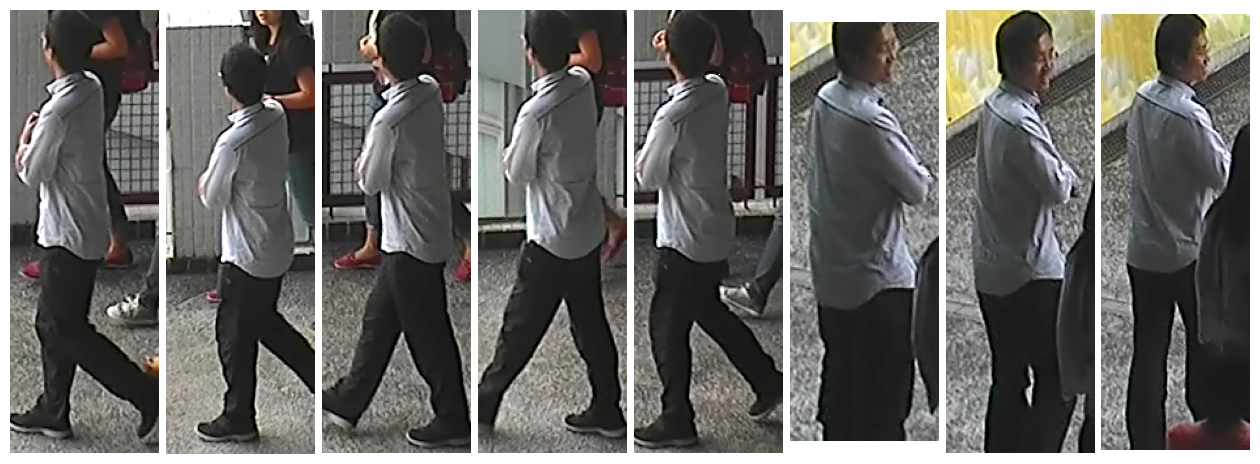

In [94]:
show_pic_from_dir('0', '/home/jun/ReID_Dataset/cuhk03/dataloader_classic_detected/gallery', 10)

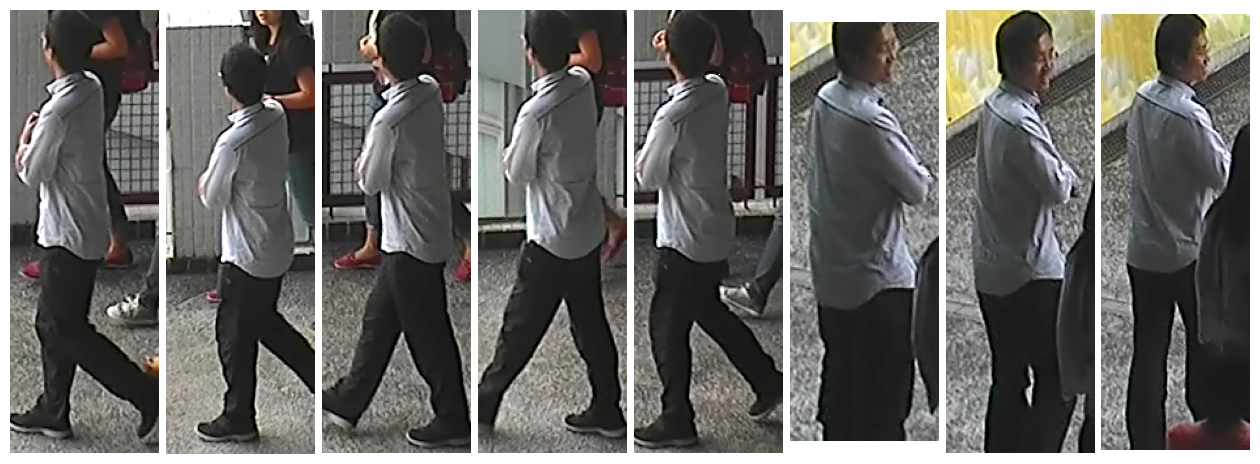

In [93]:
show_pic_from_dir('0', '/home/jun/ReID_Dataset/cuhk03/dataloader_classic_detected/query', 10)

### 3.3.2 Create new dataset with splits_new_detected.json file

In [95]:
# Read split config file
f = open('/home/jun/ReID_Dataset/cuhk03/splits_new_detected.json')
file = json.load(f)

# Set split id (total of 20):
split_num = 0

# Train, gallery, query file list: 
train_list = file[split_num]['train']
gallery_list = file[split_num]['gallery']
query_list = file[split_num]['query']

# Make dictionary of all image dataset with keys of image_name and values of image_path

detected_dic = {i.name:i for i in sorted(list(raw_data_dir_cuhk03.glob('images_detected/*.png')))}

# Make new dataset dir for labeled data
new_dataset_dir = raw_data_dir_cuhk03 / 'dataloader_new_detected' 
new_dataset_dir.mkdir(exist_ok=True) # Making new dataset dir as olod_dir/dataloader
dataset_train_dir = new_dataset_dir / 'train'
dataset_gallery_dir = new_dataset_dir / 'gallery'
dataset_query_dir = new_dataset_dir / 'query'
dataset_train_dir.mkdir(exist_ok=True) # Making train dir
dataset_gallery_dir.mkdir(exist_ok=True) # Making gallery dir
dataset_query_dir.mkdir(exist_ok=True) # Making query dir

# Making train and val dataset (first picture will be use for validation)
dataset_train_val_dir = new_dataset_dir / 'train_val'
dataset_train_val_dir.mkdir(exist_ok=True)
dataset_train_small_dir = dataset_train_val_dir / 'train'
dataset_train_small_dir.mkdir(exist_ok=True) 
dataset_val_dir = dataset_train_val_dir / 'val'
dataset_val_dir.mkdir(exist_ok=True)


# Making train dataset:
for img_path, img_label, camera_id in tqdm(train_list): # file[split_num]['train'] = [['file_path', <Image label>, <Camera ID>], [...], [...]]]
    img_path = Path(img_path.replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
    img_name = img_path.name
    train_label_folder_path = dataset_train_dir / str(img_label) # Make train label folder (train/<label>)
    train_label_folder_path.mkdir(exist_ok=True) 
    small_train_label_folder_path = dataset_train_small_dir / str(img_label) # Make train_val/train/<label> folder
    small_train_label_folder_path.mkdir(exist_ok=True) 
    val_label_folder_path = dataset_val_dir / str(img_label) # Make train_val/val/<label> folder
    val_label_folder_path.mkdir(exist_ok=True)
    (train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (train/<label>/*.img)
    if len(list(val_label_folder_path.glob('*.png'))) < 1:
        (val_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put first pic of each label into train_val/val/<label>/*.img
    else:
        (small_train_label_folder_path / img_name).write_bytes(img_path.read_bytes()) # Put every pic except fist one of each label into train_val/train/<label>/*.img   

# Making gallery dataset:
for img_path, img_label, camera_id in tqdm(gallery_list): # file[split_num]['train'] = [['file_path', <Image label>, <Camera ID>], [...], [...]]]
    img_path = Path(img_path.replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
    img_name = img_path.name
    gallery_label_folder_path = dataset_gallery_dir / str(img_label) # Make gallery label folder (gallery/<label>)
    gallery_label_folder_path.mkdir(exist_ok=True)  
    target_img_path = gallery_label_folder_path / img_name
    target_img_path.write_bytes(img_path.read_bytes()) # Put all image to train folder based on it label (gallery/<label>/*.img)
    
# Making query dataset:
for img_path, img_label, camera_id in tqdm(query_list): # file[split_num]['train'] = [['file_path', <Image label>, <Camera ID>], [...], [...]]]
    img_path = Path(img_path.replace('\\','/').replace('./data','/home/jun/ReID_Dataset'))
    img_name = img_path.name
    query_label_folder_path = dataset_query_dir / str(img_label) # Make query label folder (query/<label>)
    query_label_folder_path.mkdir(exist_ok=True)   
    target_img_path = query_label_folder_path / img_name
    target_img_path.write_bytes(img_path.read_bytes()) # Put all image to query folder based on it label (query/<label>/*.img)

  0%|          | 0/7365 [00:00<?, ?it/s]

  0%|          | 0/5332 [00:00<?, ?it/s]

  0%|          | 0/1400 [00:00<?, ?it/s]

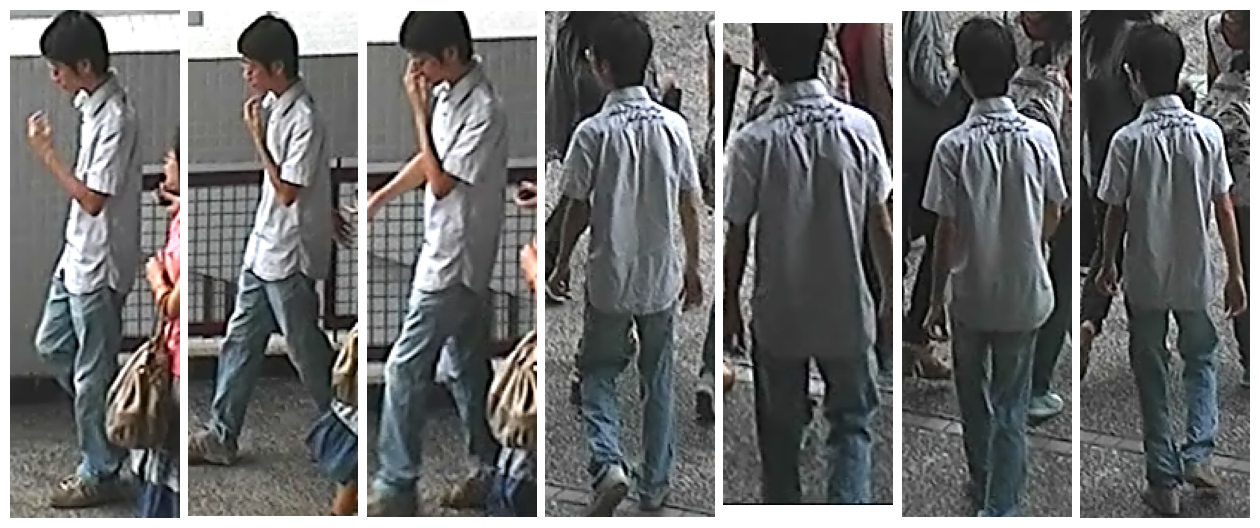

In [98]:
show_pic_from_dir('3', '/home/jun/ReID_Dataset/cuhk03/dataloader_new_detected/gallery', 10)

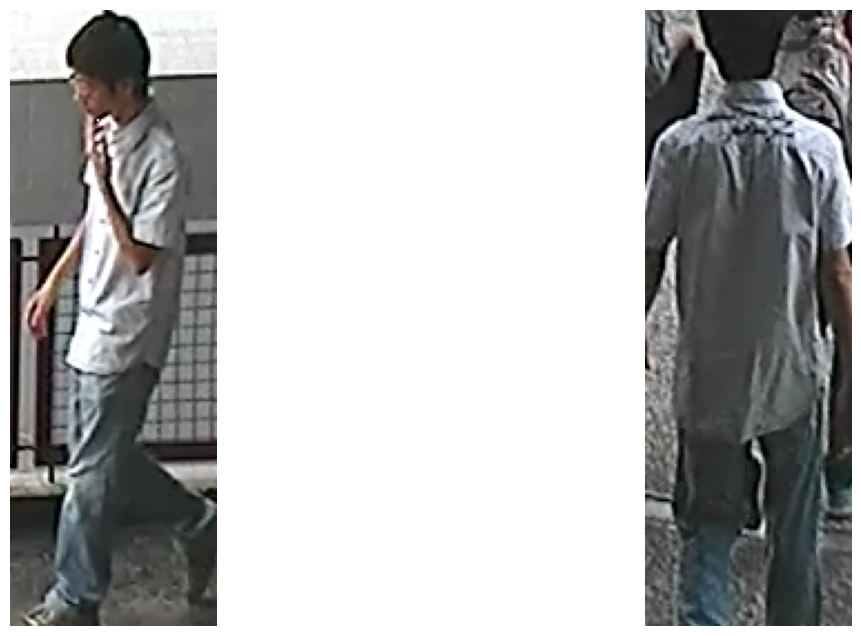

In [97]:
show_pic_from_dir('3', '/home/jun/ReID_Dataset/cuhk03/dataloader_new_detected/query', 10)